# ESTUDO SOBRE OCORRÊNCIAS AERONÁUTICAS NA AVIAÇÃO CIVIL BRASILEIRA

## Versão do Python

In [1]:
!python --version

Python 3.7.12


In [2]:
import warnings
warnings.filterwarnings('ignore')  # "error", "ignore", "always", "default", "module" or "once"


## Importando bibliotecas

In [3]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessamento
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# Classificadores
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

# Seleção de dados
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold

# Matrix de confusão
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import classification_report

In [4]:
dados = pd.read_csv('/content/drive/MyDrive/PUC Minas/CENIPA/aeronave_ocorrencia.csv', sep=';')
dados.head()

,codigo_ocorrencia,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_registro_segmento,aeronave_fase_operacao,aeronave_nivel_dano,aeronave_fatalidades_total,aeronave_peso_maximo_decolagem,ocorrencia_classificacao,ocorrencia_uf,ocorrencia_aeronaves_envolvidas,ocorrencia_saida_pista,ocorrencia_ano,ocorrencia_periodo,ocorrencia_tipo
0,39115,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,PISTÃO,MONOMOTOR,PARTICULAR,DECOLAGEM,SUBSTANCIAL,0,ATÉ 2250KG,ACIDENTE,BA,1,NÃO,2010,TARDE,PANE SECA
1,39155,AVIÃO,BEECH AIRCRAFT,TURBOÉLICE,BIMOTOR,PARTICULAR,DECOLAGEM,NENHUM,0,ENTRE 2250KG E 5700KG,INCIDENTE,MG,1,NÃO,2010,TARDE,VAZAMENTO DE COMBUSTÍVEL
2,39156,AVIÃO,AEROSPATIALE AND ALENIA,TURBOÉLICE,BIMOTOR,REGULAR,ARREMETIDA NO AR,LEVE,0,ACIMA 5700KG,INCIDENTE GRAVE,PR,1,NÃO,2010,NOITE,FOGO EM VOO
3,39158,AVIÃO,BOEING COMPANY,JATO,BIMOTOR,REGULAR,SUBIDA,NENHUM,0,ACIMA 5700KG,INCIDENTE,PA,1,NÃO,2010,TARDE,SUPERAQUECIMENTO
4,39176,AVIÃO,AIRBUS INDUSTRIE,JATO,BIMOTOR,REGULAR,SUBIDA,NENHUM,0,ACIMA 5700KG,INCIDENTE,MA,1,NÃO,2010,MANHÃ,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...


# 2. Criação de Modelos de Machine Learning




### Sobre o conjunto de dados ocorrencia

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6188 entries, 0 to 6187
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   codigo_ocorrencia                6188 non-null   int64 
 1   aeronave_tipo_veiculo            6188 non-null   object
 2   aeronave_fabricante              6188 non-null   object
 3   aeronave_motor_tipo              6188 non-null   object
 4   aeronave_motor_quantidade        6188 non-null   object
 5   aeronave_registro_segmento       6188 non-null   object
 6   aeronave_fase_operacao           6188 non-null   object
 7   aeronave_nivel_dano              6188 non-null   object
 8   aeronave_fatalidades_total       6188 non-null   int64 
 9   aeronave_peso_maximo_decolagem   6188 non-null   object
 10  ocorrencia_classificacao         6188 non-null   object
 11  ocorrencia_uf                    6188 non-null   object
 12  ocorrencia_aeronaves_envolvidas  6

In [6]:
dados.isna().sum()

codigo_ocorrencia                  0
aeronave_tipo_veiculo              0
aeronave_fabricante                0
aeronave_motor_tipo                0
aeronave_motor_quantidade          0
aeronave_registro_segmento         0
aeronave_fase_operacao             0
aeronave_nivel_dano                0
aeronave_fatalidades_total         0
aeronave_peso_maximo_decolagem     0
ocorrencia_classificacao           0
ocorrencia_uf                      0
ocorrencia_aeronaves_envolvidas    0
ocorrencia_saida_pista             0
ocorrencia_ano                     0
ocorrencia_periodo                 0
ocorrencia_tipo                    0
dtype: int64

In [7]:
dados['ocorrencia_classificacao'].value_counts()

INCIDENTE          3432
ACIDENTE           1943
INCIDENTE GRAVE     813
Name: ocorrencia_classificacao, dtype: int64

In [8]:
dados.columns

Index(['codigo_ocorrencia', 'aeronave_tipo_veiculo', 'aeronave_fabricante',
       'aeronave_motor_tipo', 'aeronave_motor_quantidade',
       'aeronave_registro_segmento', 'aeronave_fase_operacao',
       'aeronave_nivel_dano', 'aeronave_fatalidades_total',
       'aeronave_peso_maximo_decolagem', 'ocorrencia_classificacao',
       'ocorrencia_uf', 'ocorrencia_aeronaves_envolvidas',
       'ocorrencia_saida_pista', 'ocorrencia_ano', 'ocorrencia_periodo',
       'ocorrencia_tipo'],
      dtype='object')

In [9]:
numero_fabricantes = len(dados['aeronave_fabricante'].unique())
print(f'Número de fabricantes: {numero_fabricantes}')

Número de fabricantes: 251


In [10]:
X = dados[['aeronave_tipo_veiculo',
       'aeronave_motor_tipo', 'aeronave_motor_quantidade',
       'aeronave_registro_segmento', 'aeronave_fase_operacao',
       'aeronave_nivel_dano', 'aeronave_fatalidades_total',
       'aeronave_peso_maximo_decolagem',
       'ocorrencia_uf', 'ocorrencia_aeronaves_envolvidas',
       'ocorrencia_saida_pista', 'ocorrencia_ano', 'ocorrencia_periodo',
       'ocorrencia_tipo']]
Y = dados['ocorrencia_classificacao']

In [11]:
X.head()

,aeronave_tipo_veiculo,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_registro_segmento,aeronave_fase_operacao,aeronave_nivel_dano,aeronave_fatalidades_total,aeronave_peso_maximo_decolagem,ocorrencia_uf,ocorrencia_aeronaves_envolvidas,ocorrencia_saida_pista,ocorrencia_ano,ocorrencia_periodo,ocorrencia_tipo
0,AVIÃO,PISTÃO,MONOMOTOR,PARTICULAR,DECOLAGEM,SUBSTANCIAL,0,ATÉ 2250KG,BA,1,NÃO,2010,TARDE,PANE SECA
1,AVIÃO,TURBOÉLICE,BIMOTOR,PARTICULAR,DECOLAGEM,NENHUM,0,ENTRE 2250KG E 5700KG,MG,1,NÃO,2010,TARDE,VAZAMENTO DE COMBUSTÍVEL
2,AVIÃO,TURBOÉLICE,BIMOTOR,REGULAR,ARREMETIDA NO AR,LEVE,0,ACIMA 5700KG,PR,1,NÃO,2010,NOITE,FOGO EM VOO
3,AVIÃO,JATO,BIMOTOR,REGULAR,SUBIDA,NENHUM,0,ACIMA 5700KG,PA,1,NÃO,2010,TARDE,SUPERAQUECIMENTO
4,AVIÃO,JATO,BIMOTOR,REGULAR,SUBIDA,NENHUM,0,ACIMA 5700KG,MA,1,NÃO,2010,MANHÃ,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...


In [12]:
Y.head() 

0           ACIDENTE
1          INCIDENTE
2    INCIDENTE GRAVE
3          INCIDENTE
4          INCIDENTE
Name: ocorrencia_classificacao, dtype: object

In [13]:
# Encoder indicado para transformar atributos alvo categóricos
# em atributos numéricos entre 0 e número de valores da classe – 1
le = LabelEncoder()
Y = le.fit_transform(Y)

# Imprimindo as primeiras 10 posições do array
print(Y[:10])

[0 1 2 1 1 1 0 0 0 0]


In [14]:
dados['ocorrencia_classificacao'] # 2 - INCIDENTE GRAVE 1 - INCIDENTE, 0 - ACIDENTE

0              ACIDENTE
1             INCIDENTE
2       INCIDENTE GRAVE
3             INCIDENTE
4             INCIDENTE
             ...       
6183          INCIDENTE
6184          INCIDENTE
6185           ACIDENTE
6186           ACIDENTE
6187          INCIDENTE
Name: ocorrencia_classificacao, Length: 6188, dtype: object

In [15]:
list(dados.select_dtypes(['object']).columns)

['aeronave_tipo_veiculo',
 'aeronave_fabricante',
 'aeronave_motor_tipo',
 'aeronave_motor_quantidade',
 'aeronave_registro_segmento',
 'aeronave_fase_operacao',
 'aeronave_nivel_dano',
 'aeronave_peso_maximo_decolagem',
 'ocorrencia_classificacao',
 'ocorrencia_uf',
 'ocorrencia_saida_pista',
 'ocorrencia_periodo',
 'ocorrencia_tipo']

In [16]:
'''
  Encoder indicado para transformar atributos não alvo categóricos em atributos numéricos. 
  Neste encoder, todos os valores únicos do atributo são convertidos em colunas binárias 
  formando uma matriz. 
'''
# Instanciando o transformador
ohe = OneHotEncoder(handle_unknown='ignore')

# Transforma as colunas indicadas, retornando uma lista arrays
dummies = ohe.fit_transform(X[['aeronave_tipo_veiculo', 
                               'aeronave_motor_tipo','aeronave_motor_quantidade',
                               'aeronave_registro_segmento', 'aeronave_fase_operacao',
                               'aeronave_nivel_dano', 'aeronave_peso_maximo_decolagem',
                               'ocorrencia_uf', 'ocorrencia_saida_pista', 'ocorrencia_periodo',
                               'ocorrencia_tipo']]).toarray()

# Convertendo a lista de arrays em um DataFrame
dummy_features = pd.DataFrame(dummies)

# Concatenando as colunas transformadas a X
X = pd.concat([X,dummy_features], axis='columns')

# Removendo as colunas originais
X = X.drop(columns=['aeronave_tipo_veiculo', 
                               'aeronave_motor_tipo','aeronave_motor_quantidade',
                               'aeronave_registro_segmento', 'aeronave_fase_operacao',
                               'aeronave_nivel_dano', 'aeronave_peso_maximo_decolagem',
                               'ocorrencia_uf', 'ocorrencia_saida_pista', 'ocorrencia_periodo',
                               'ocorrencia_tipo'])

In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6188 entries, 0 to 6187
Columns: 194 entries, aeronave_fatalidades_total to 190
dtypes: float64(191), int64(3)
memory usage: 9.2 MB


In [18]:
X.count()

aeronave_fatalidades_total         6188
ocorrencia_aeronaves_envolvidas    6188
ocorrencia_ano                     6188
0                                  6188
1                                  6188
                                   ... 
186                                6188
187                                6188
188                                6188
189                                6188
190                                6188
Length: 194, dtype: int64

In [19]:
X.isna().sum()

aeronave_fatalidades_total         0
ocorrencia_aeronaves_envolvidas    0
ocorrencia_ano                     0
0                                  0
1                                  0
                                  ..
186                                0
187                                0
188                                0
189                                0
190                                0
Length: 194, dtype: int64

In [20]:
X.nunique()

aeronave_fatalidades_total         11
ocorrencia_aeronaves_envolvidas     3
ocorrencia_ano                     12
0                                   2
1                                   2
                                   ..
186                                 2
187                                 2
188                                 2
189                                 2
190                                 2
Length: 194, dtype: int64

In [21]:
X.describe()

,aeronave_fatalidades_total,ocorrencia_aeronaves_envolvidas,ocorrencia_ano,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,...,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190
count,6188.000000,6188.000000,6188.000000,6188.000000,6188.000000,6188.000000,6188.000000,6188.000000,6188.000000,6188.000000,6188.000000,6188.000000,6188.000000,6188.000000,6188.000000,6188.000000,6188.000000,6188.000000,6188.000000,6188.000000,6188.000000,6188.000000,6188.000000,6188.000000,6188.000000,6188.000000,6188.000000,6188.000000,6188.000000,6188.000000,6188.000000,6188.000000,6188.000000,6188.000000,6188.000000,6188.000000,6188.000000,6188.000000,6188.000000,6188.000000,...,6188.000000,6188.000000,6188.000000,6188.000000,6188.000000,6188.000000,6188.000000,6188.000000,6188.000000,6188.000000,6188.000000,6188.000000,6188.000000,6188.000000,6188.000000,6188.000000,6188.000000,6188.000000,6188.000000,6188.000000,6188.000000,6188.000000,6188.000000,6188.000000,6188.000000,6188.000000,6188.000000,6188.000000,6188.000000,6188.000000,6188.000000,6188.000000,6188.000000,6188.000000,6188.000000,6188.000000,6188.000000,6188.000000,6188.000000,6188.000000
mean,0.147382,1.024887,2015.076438,0.002424,0.803006,0.000162,0.000323,0.111183,0.000162,0.022624,0.003555,0.000808,0.055753,0.193116,0.033452,0.552198,0.003555,0.092437,0.125242,0.442793,0.504525,0.013251,0.001131,0.025372,0.012928,0.032967,0.001454,0.060601,0.020200,0.077893,0.000323,0.138979,0.005333,0.014383,0.004848,0.304622,0.205882,0.132515,0.051228,0.005010,...,0.001293,0.003394,0.000646,0.000485,0.004525,0.000970,0.000162,0.000485,0.004363,0.022140,0.001778,0.013736,0.001778,0.052683,0.017776,0.000646,0.009373,0.004202,0.000162,0.057854,0.066096,0.000162,0.002262,0.000323,0.016645,0.017453,0.010181,0.015029,0.001454,0.000162,0.000162,0.000162,0.002586,0.000646,0.002586,0.025210,0.001293,0.002747,0.009373,0.006464
std,0.674597,0.164866,3.423996,0.049179,0.397760,0.012712,0.017976,0.314384,0.012712,0.148715,0.059525,0.028416,0.229463,0.394775,0.179828,0.497308,0.059525,0.289665,0.331020,0.496757,0.500020,0.114359,0.033617,0.157264,0.112974,0.178565,0.038112,0.238617,0.140697,0.268024,0.017976,0.345952,0.072838,0.119072,0.069465,0.460284,0.404378,0.339077,0.220481,0.070607,...,0.035936,0.058161,0.025418,0.022015,0.067120,0.031126,0.012712,0.022015,0.065916,0.147149,0.042128,0.116403,0.042128,0.223417,0.132148,0.025418,0.096367,0.064689,0.012712,0.233486,0.248469,0.012712,0.047515,0.017976,0.127948,0.130963,0.100394,0.121678,0.038112,0.012712,0.012712,0.012712,0.050788,0.025418,0.050788,0.156775,0.035936,0.052346,0.096367,0.080146
min,0.000000,1.000000,2010.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,2012.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

In [22]:
# Instanciando o normalizador
ste = StandardScaler()

# Normalizando os atributos da variável X
X_normalizado = ste.fit_transform(X)

# Gerando um DataFrame com os valores normalizados
X_normalizado = pd.DataFrame(X_normalizado)

In [23]:
X_normalizado.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193
0,-0.218492,-0.150964,-1.482726,-0.049294,0.495299,-0.012713,-0.017981,-0.353682,-0.012713,-0.152145,-0.059732,-0.028437,-0.242992,-0.489219,-0.186037,0.900525,-0.059732,-0.319142,-0.378383,-0.891439,0.990991,-0.115885,-0.033653,-0.161345,-0.114445,-0.184637,-0.038165,-0.253989,-0.143586,-0.290642,-0.017981,-0.40176,-0.073222,-0.1208,-0.069798,1.510880,-0.509175,-0.390842,-0.232367,-0.070957,...,-0.035979,-0.058354,-0.025433,-0.022024,-0.06742,-0.031154,-0.012713,-0.022024,-0.0662,-0.150469,-0.0422,-0.118015,-0.0422,-0.235823,7.433340,-0.025433,-0.097271,-0.064957,-0.012713,-0.247803,-0.266033,-0.012713,-0.047619,-0.017981,-0.130103,-0.133278,-0.101419,-0.123525,-0.038165,-0.012713,-0.012713,-0.012713,-0.050915,-0.025433,-0.050915,-0.160817,-0.035979,-0.052486,-0.097271,-0.080661
1,-0.218492,-0.150964,-1.482726,-0.049294,0.495299,-0.012713,-0.017981,-0.353682,-0.012713,-0.152145,-0.059732,-0.028437,-0.242992,-0.489219,-0.186037,-1.110463,-0.059732,-0.319142,2.642824,1.121782,-1.009091,-0.115885,-0.033653,-0.161345,-0.114445,-0.184637,-0.038165,-0.253989,-0.143586,-0.290642,-0.017981,-0.40176,-0.073222,-0.1208,-0.069798,1.510880,-0.509175,-0.390842,-0.232367,-0.070957,...,-0.035979,-0.058354,-0.025433,-0.022024,-0.06742,-0.031154,-0.012713,-0.022024,-0.0662,-0.150469,-0.0422,-0.118015,-0.0422,-0.235823,-0.134529,-0.025433,-0.097271,-0.064957,-0.012713,-0.247803,-0.266033,-0.012713,-0.047619,-0.017981,-0.130103,-0.133278,-0.101419,-0.123525,-0.038165,-0.012713,-0.012713,-0.012713,-0.050915,-0.025433,-0.050915,-0.160817,-0.035979,19.052559,-0.097271,-0.080661
2,-0.218492,-0.150964,-1.482726,-0.049294,0.495299,-0.012713,-0.017981,-0.353682,-0.012713,-0.152145,-0.059732,-0.028437,-0.242992,-0.489219,-0.186037,-1.110463,-0.059732,-0.319142,2.642824,1.121782,-1.009091,-0.115885,-0.033653,-0.161345,-0.114445,-0.184637,-0.038165,-0.253989,-0.143586,-0.290642,-0.017981,-0.40176,-0.073222,-0.1208,-0.069798,-0.661866,1.963961,-0.390842,-0.232367,14.093009,...,27.793884,-0.058354,-0.025433,-0.022024,-0.06742,-0.031154,-0.012713,-0.022024,-0.0662,-0.150469,-0.0422,-0.118015,-0.0422,-0.235823,-0.134529,-0.025433,-0.097271,-0.064957,-0.012713,-0.247803,-0.266033,-0.012713,-0.047619,-0.017981,-0.130103,-0.133278,-0.101419,-0.123525,-0.038165,-0.012713,-0.012713,-0.012713,-0.050915,-0.025433,-0.050915,-0.160817,-0.035979,-0.052486,-0.097271,-0.080661
3,-0.218492,-0.150964,-1.482726,-0.049294,0.495299,-0.012713,-0.017981,-0.353682,-0.012713,-0.152145,-0.059732,-0.028437,-0.242992,2.044075,-0.186037,-1.110463,-0.059732,-0.319142,-0.378383,1.121782,-1.009091,-0.115885,-0.033653,-0.161345,-0.114445,-0.184637,-0.038165,-0.253989,-0.143586,-0.290642,-0.017981,-0.40176,-0.073222,-0.1208,-0.069798,-0.661866,1.963961,-0.390842,-0.232367,-0.070957,...,-0.035979,-0.058354,-0.025433,-0.022024,-0.06742,-0.031154,-0.012713,-0.022024,-0.0662,-0.150469,-0.0422,-0.118015,-0.0422,-0.235823,-0.134529,-0.025433,-0.097271,-0.064957,-0.012713,-0.247803,-0.266033,-0.012713,-0.047619,-0.017981,-0.130103,-0.133278,-0.101419,-0.123525,-0.038165,-0.012713,-0.012713,-0.012713,-0.050915,-0.025433,19.640519,-0.160817,-0.035979,-0.052486,-0.097271,-0.080661
4,-0.218492,-0.150964,-1.482726,-0.049294,0.495299,-0.012713,-0.017981,-0.353682,-0.012713,-0.152145,-0.059732,-0.028437,-0.242992,2.044075,-0.186037,-1.110463,-0.059732,-0.319142,-0.378383,1.121782,-1.009091,-0.115885,-0.033653,-0.161345,-0.114445,-0.184637,-0.038165,-0.253989,-0.143586,-0.290642,-0.017981,-0.40176,-0.073222,-0.1208,-0.069798,-0.661866,1.963961,-0.390842,-0.232367,-0.070957,...,-0.035979,-0.058354,-0.025433,-0.022024,-0.06742,-0.031154,-0.012713,-0.022024,-0.0662,-0.150469,-0.0422,-0.118015,-0.0422,-0.235823,-0.134529,-0.025433,-0.097

In [24]:
SEED = 42
np.random.seed(SEED)

# Separando o conjunto de dados em treino/teste e validação
treino_X, validacao_X, treino_Y, validacao_Y = train_test_split(X_normalizado,\
                                              Y, train_size=0.8,\
                                              random_state=SEED)

In [25]:
'''
  Função responsável por realizar o Cross-Validation, calcula a média 
  de métricas como acurácia, precisão, recall e F1 score e retorna 
  dataframe com as métricas calculadas por modelo.

  Parâmetros de Entrada: Lista de Modelo de Classificação,
                          Dados de Treino e Dados Alvo de Treino

  Retorna dataframe com as métricas calculadas por modelo
'''
def obter_metricas(lista_modelo , treino_X, treino_Y):
  
  # Quantidade de k-fold
  k = 10
  
  # Lista de resultados
  metricas = []

  # Quantidade de k-fold
  kfold  = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

  # Percorre a lista de modelos de classificação
  for modelo in lista_modelo:

    # Obtendos os scores de cada execução
    resultado = cross_validate(modelo, treino_X, treino_Y, cv = kfold,\
                               scoring=['accuracy','precision_weighted',
                                        'recall_weighted','f1_weighted'])

    # Recupera as métricas a partir do resultado
    acuracia = np.mean(resultado['test_accuracy'])
    precisao = np.mean(resultado['test_precision_weighted'])
    recall = np.mean(resultado['test_recall_weighted'])
    f1 = np.mean(resultado['test_f1_weighted'])

    # Monta a lista de resultados
    metricas.append([modelo, acuracia, precisao, recall, f1])

  # Orderna a lista por acuracia
  metricas = sorted(metricas, key=lambda x:x[4],reverse=True)

  # Converte e lista de resultados em dataframe
  df_metricas = pd.DataFrame(metricas, columns=['modelo',
                                                'accuracy',
                                                'precision',
                                                'recall',
                                                'f1_score'])

  
  return df_metricas

In [26]:
# Lista de modelos para comparação de métricas
lista_modelos = [DummyClassifier(strategy='most_frequent', random_state=SEED),\
                 KNeighborsClassifier(n_neighbors=20),\
                 LinearSVC(random_state=SEED),\
                 DecisionTreeClassifier(random_state=SEED),\
                 RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=SEED)]

# Dataframe ordenado por arcurácia
df_metricas = obter_metricas(lista_modelos, treino_X, treino_Y)

df_metricas

,modelo,accuracy,precision,recall,f1_score
0,"RandomForestClassifier(criterion='entropy', ra...",0.884444,0.874463,0.884444,0.874113
1,LinearSVC(random_state=42),0.874141,0.860590,0.874141,0.861513
2,DecisionTreeClassifier(random_state=42),0.846667,0.846744,0.846667,0.846306
3,KNeighborsClassifier(n_neighbors=20),0.790303,0.768206,0.790303,0.762145
4,"DummyClassifier(random_state=42, strategy='mos...",0.557980,0.311342,0.557980,0.399674


In [27]:
# Extraindo o modelo vencedor do DataFrame
modelo_vencedor = df_metricas['modelo'].iloc[0]
modelo_vencedor

RandomForestClassifier(criterion='entropy', random_state=42)

In [28]:
obter_metricas([modelo_vencedor], validacao_X, validacao_Y)

,modelo,accuracy,precision,recall,f1_score
0,"RandomForestClassifier(criterion='entropy', ra...",0.858661,0.836888,0.858661,0.831133


In [29]:
# Definindo a quantidade de splits do k-fold
kfold  = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# obtendo as previsoes do modelo vencedor
previsoes = cross_val_predict(modelo_vencedor,validacao_X, validacao_Y,cv=kfold)

previsoes

array([2, 1, 0, ..., 0, 0, 2])

In [30]:
print(classification_report(validacao_Y, previsoes,target_names=['ACIDENTE','INCIDENTE','INCIDENTE GRAVE']))

                 precision    recall  f1-score   support

       ACIDENTE       0.89      0.94      0.91       397
      INCIDENTE       0.86      0.97      0.91       670
INCIDENTE GRAVE       0.64      0.22      0.33       171

       accuracy                           0.86      1238
      macro avg       0.80      0.71      0.72      1238
   weighted avg       0.84      0.86      0.83      1238



In [31]:
'''
Função responsável por gerar as matrizes de confusão de cada label de classe
em relação as demais classes.
Entrada: Y e as previsões do modelo
Retorna: Matrizes de Confusão
'''
def gera_matrix_confusao(Y, previsoes):

  # obter uma lista com as matrizes de confusão
  cm = multilabel_confusion_matrix(Y, previsoes)

  # variáveis utilizadas no processo de plotagem
  labels = ['ACIDENTE', 'INCIDENTE', 'INCIDENTE GRAVE']
  indice = 0

  for matriz in cm:                   
    cm_df = pd.DataFrame(matriz, index = ['RESTO', labels[indice]], 
                      columns = ['RESTO', labels[indice]])

    plt.figure(figsize=(8,7))
    sns.heatmap(cm_df, annot=True, fmt='g')
    plt.title(f'Matriz de Confusão - Classe: {labels[indice]}')
    plt.ylabel('Valores Atuais')
    plt.xlabel('Valores Previstos')
    indice+=1
    plt.show()
  return cm 

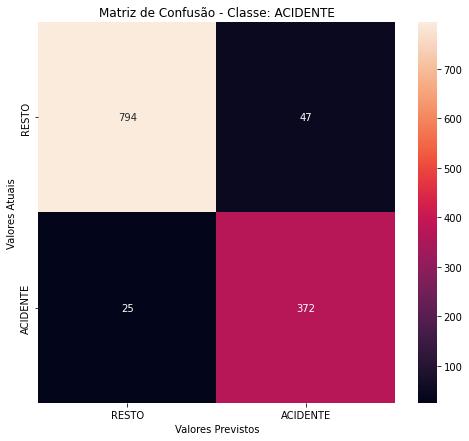

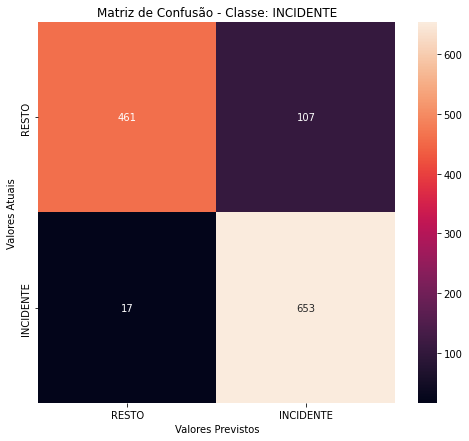

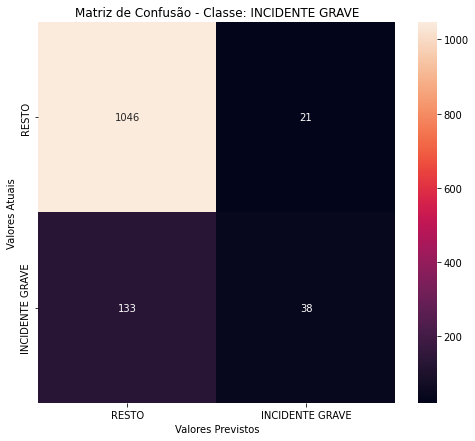

In [32]:
matrizes_confusao = gera_matrix_confusao(validacao_Y, previsoes)

In [33]:
!pip install auto-sklearn

In [34]:
from autosklearn.classification import AutoSklearnClassifier

In [35]:
# Instanciar o classificador
cls = AutoSklearnClassifier()

# Ajustando o modelo aos dados de treino
cls.fit(treino_X, treino_Y)

# Obtendo as previsões com os dados de validação
previsoes_automl = cls.predict(validacao_X)

In [36]:
from sklearn import metrics
print('MÉTRICAS DE AVALIAÇÃO AUTOML')
print('----------------------------')
print("Accuracy:", metrics.accuracy_score(validacao_Y, previsoes_automl))
print("Precision:", metrics.precision_score(validacao_Y, previsoes_automl, average='weighted'))
print("Recall:", metrics.recall_score(validacao_Y, previsoes_automl, average='weighted'))
print("F1 Score:", metrics.f1_score(validacao_Y, previsoes_automl, average='weighted'))

MÉTRICAS DE AVALIAÇÃO AUTOML
----------------------------
Accuracy: 0.875605815831987
Precision: 0.8628655713296092
Recall: 0.875605815831987
F1 Score: 0.8608628855516304


In [37]:
print(cls.show_models())

[(0.360000, SimpleClassificationPipeline({'balancing:strategy': 'none', 'classifier:__choice__': 'adaboost', 'data_preprocessor:__choice__': 'feature_type', 'feature_preprocessor:__choice__': 'no_preprocessing', 'classifier:adaboost:algorithm': 'SAMME', 'classifier:adaboost:learning_rate': 0.1713779776718717, 'classifier:adaboost:max_depth': 5, 'classifier:adaboost:n_estimators': 352, 'data_preprocessor:feature_type:categorical_transformer:categorical_encoding:__choice__': 'one_hot_encoding', 'data_preprocessor:feature_type:categorical_transformer:category_coalescence:__choice__': 'no_coalescense', 'data_preprocessor:feature_type:numerical_transformer:imputation:strategy': 'most_frequent', 'data_preprocessor:feature_type:numerical_transformer:rescaling:__choice__': 'power_transformer'},
dataset_properties={
  'task': 2,
  'sparse': False,
  'multilabel': False,
  'multiclass': True,
  'target_type': 'classification',
  'signed': False})),
(0.280000, SimpleClassificationPipeline({'balan